In [63]:
import pandas as pd
import glob 
import matplotlib.pyplot as plt
import os

In [124]:
filename = glob.glob("./results/1b*.txt")[1]
filename


'./results/1b_milan2.txt'

In [125]:
df = pd.read_csv(filename, sep="|")
df = df.drop(df.columns[[0, -1]], axis=1)
df.columns = [col.strip() for col in df.columns]
df


,SumType,Datasize,Latency[ns],Cycles,Checksum
0,sum_indexcalc k=1,1.024000e+03,1.99,1000.0,1.024000e+03
1,sum_indexload k=1,1.024000e+03,4.04,1000.0,1.024000e+03
2,sum_indexcalc k=gold,1.024000e+03,1.99,1000.0,1.024000e+03
3,sum_indexload k=gold,1.024000e+03,4.04,1000.0,1.024000e+03
4,sum_indexcalc k=1,2.048000e+03,1.20,1000.0,2.048000e+03
...,...,...,...,...,...
80,sum_indexcalc k=1,1.073742e+09,1.96,1.0,1.073742e+09
81,sum_indexload k=1,1.073742e+09,1.74,1.0,1.073742e+09
82,sum_indexcalc k=gold,1.073742e+09,7.85,1.0,1.073742e+09
83,sum_indexload k=gold,1.073742e+09,1.74,1.0,1.073742e+09


In [126]:
arch = filename.split("/")[-1].split("_")[-1][:-4]
print(arch)

milan2


./results/img/e_1b_milan2.png
0


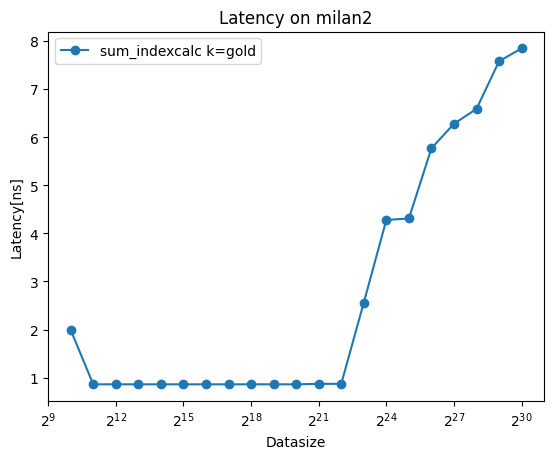

In [128]:
groups = df.groupby(['SumType'])
max_elem = 0
for method in ["indexcalc"]:
    for name, group in groups:
        if method not in name[0]:
            continue
        if "k=gold" not in name[0]:
            continue
        plt.plot(group['Datasize'].to_list(), group['Latency[ns]'].to_list(), marker='o', label=name[0].strip())
        # set log scale for x axis
        # log2 scale
        if "1c" in filename:
            if max_elem < group['Latency[ns]'].max():
                max_elem = group['Latency[ns]'].max()
plt.xlabel("Datasize")
plt.ylabel("Latency[ns]")
plt.xscale('log', base=2)
plt.title(f"Latency on {arch}")
plt.legend()
result_name=f"./results/img/e_{os.path.basename(filename)[:-4]}.png"
print(result_name)
print(max_elem)
plt.savefig(result_name)